___
# A1 - Avaliação de Ciência dos dados 

## 2022 - 2o. semestre 

___


## NOME: Bruno Zalcberg

In [1]:
# %matplotlib inline
import math
from math import sqrt

import os
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import pandas as pd

from IPython.display import display  # Para ter melhor print.

# Pode trazer mais bibliotecas, caso julgue interessante!!

<div id="indice"></div>

## Índice

1. [Pergunta 1](#p1)

1. [Pergunta 2](#p2)

1. [Pergunta 3](#p3)

1. [Pergunta 4](#p4)

1. [Pergunta 5](#p5)

1. [Pergunta 6](#p5)

<div id="abrindo-arquivo"></div>

___

**Abrindo um arquivo de dados e visualizando seu conteúdo:**


In [2]:
print(f'Esperamos trabalhar no diretório: \n{os.getcwd()}\n')

Esperamos trabalhar no diretório: 
D:\main\edu\insper\cdados\quiz1



In [3]:
filename_ds = 'ds_salaries.xlsx'

if filename_ds in os.listdir():
    print(f'Parece que o arquivo {filename_ds} está na mesma pasta do notebook, yay!')
    
else:
    print(f'Não encontrei o arquivo {filename_ds}. Lembre-se que precisa estar na mesma pasta do arquivo notebook')

Parece que o arquivo ds_salaries.xlsx está na mesma pasta do notebook, yay!


Abrindo a base de dados:

In [4]:
df_sal = pd.read_excel(filename_ds)

Avaliando as 3 primeiras linhas da base de dados:

In [5]:
df_sal.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,monthly_expensies
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,1382
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,1405
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,1441


Avaliando o tipo de cada variável disponível no *dataframe* `df_sal`:

[Voltar ao Índice](#indice)

___
<div id="p1"></div>

## PERGUNTA 1: 
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [6]:
f_abs = df_sal["job_title"].value_counts()
f_rel = df_sal["job_title"].value_counts(normalize=True)

print(f_abs)
print(f_rel)

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

[Voltar ao Índice](#indice)

___
<div id="p2"></div>

## PERGUNTA 2:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [16]:
df_sal_2021 = df_sal[(df_sal["work_year"] == 2021) & (df_sal["employment_type"] == "FT")]

f_abs_2021 = df_sal_2021["company_location"].value_counts()
## print(f_abs_2021) US, DE, IN, GB, CA

df_sal_2021_2 = df_sal_2021[df_sal_2021["company_location"].isin(["US", "DE", "IN", "GB", "CA"])]
r = (df_sal_2021_2["salary_in_usd"].describe(percentiles=[.25, .4, .5, .75])).round(4)
print(r)

count       149.0000
mean     116779.7517
std       80418.6697
min        5679.0000
25%       70000.0000
40%       88923.2000
50%       99703.0000
75%      150000.0000
max      600000.0000
Name: salary_in_usd, dtype: float64


[Voltar ao Índice](#indice)

___
<div id="p3"></div>

## PERGUNTA 3:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [28]:
print(pd.crosstab(df_sal["company_size"], df_sal["remote_ratio"]))
print("\n")
print(pd.crosstab(df_sal["company_size"], df_sal["remote_ratio"], normalize=True).round(4))
print("\n")

## Continhas manuais pro item A

p = 0.3723 / (0.1301 + 0.0346 + 0.3723)
print(round(p, 4))

remote_ratio  0    50   100
company_size               
L              32   60  106
M              79   21  226
S              16   18   49


remote_ratio     0       50      100
company_size                        
L             0.0527  0.0988  0.1746
M             0.1301  0.0346  0.3723
S             0.0264  0.0297  0.0807


0.6933


[Voltar ao Índice](#indice)

<div id="p4"></div>

## PERGUNTA 4:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

In [32]:
df_sal_gb = df_sal[df_sal["employee_residence"] == "GB"]
corr_gb = df_sal_gb.monthly_expensies.corr(df_sal_gb.salary_in_usd)

print(round(corr_gb, 4))

0.961


[Voltar ao Índice](#indice)

<div id="p5"></div>

## PERGUNTA 5:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

20.0


C:\Users\brun0\AppData\Local\Temp/ipykernel_46568/3265623939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sal_us["salary_in_10kusd"] = df_sal_us["salary_in_usd"] / 10000


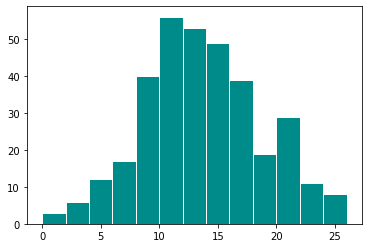

In [44]:
df_sal_us = df_sal[df_sal["company_location"] == "US"]
df_sal_us["salary_in_10kusd"] = df_sal_us["salary_in_usd"] / 10000

faixas = arange(0, 28, 2)
plt.hist(df_sal_us.salary_in_10kusd, bins=faixas, color='darkcyan', edgecolor='white')

variávelCateg = pd.cut(df_sal_us.salary_in_10kusd, bins=faixas, right=False)
variávelCateg.value_counts()

d = 40 / 2
print(d)

[Voltar ao Índice](#indice)

<div id="p6"></div>

## PERGUNTA 6:
Leia Enunciado no Blackboard. Preencha as respostas no Blackboard! Envie o Notebook antes de finalizar o proctorio!

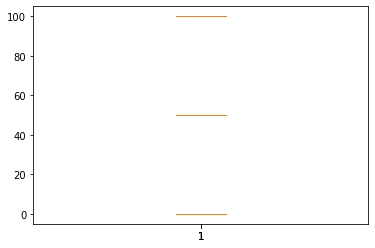

In [50]:
df_sal_2022 = df_sal[df_sal["work_year"] == 2022]

df_sal_2022_0 = df_sal_2022[df_sal_2022["remote_ratio"] == 0]
df_sal_2022_50 = df_sal_2022[df_sal_2022["remote_ratio"] == 50]
df_sal_2022_100 = df_sal_2022[df_sal_2022["remote_ratio"] == 100]

plt.boxplot(df_sal_2022_0.remote_ratio)
plt.boxplot(df_sal_2022_50.remote_ratio)
plt.boxplot(df_sal_2022_100.remote_ratio)
plt.show()

[Voltar ao Índice](#indice)